# Double pendulum using Lagrange's equation

Defines a DoublePendulum class that is used to generate double pendulum plots from solving Lagrange's equations.

In [1]:
from IPython.display import Image

In [2]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Double-Pendulum.svg/1200px-Double-Pendulum.svg.png')

## Euler-Lagrange equation

For a simple pendulum, the Lagrangian with generalized coordinate $\phi$ is

$\begin{align}
  \mathcal{L} = \frac12 m L^2 \dot\phi^2 - mgL(1 - \cos\phi)
\end{align}$

The Euler-Lagrange equation is

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi} = \frac{\partial\mathcal L}{\partial\phi}
 \quad\Longrightarrow\quad
 m L^2 \ddot \phi = -mgL\sin\phi
  \ \mbox{or}\ \ddot\phi = - \omega_0^2\sin\phi = 0
  \;.
\end{align}$

In [3]:
%matplotlib inline

In [4]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [5]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [6]:
class DoublePendulum():
    """
    This class uses Lagrange's equations to solve for a simple double pendulum.
    
    Parameters:
    ----------------
    L1: float
        length of the first pendulum
    L2: float
        length of the second pendulum
    g: float
        gravitational acceleration at the earth's surface
    mn: float
        mass of pendulum bob, where n is the pendulum bob number
        
    Methods
    ---------
    dy_dt(t, y)
        returns the right side of the differential equation in vector y, given time t and the corresponding value of y.
    
    """
    
    def __init__(self, L1=1., L2=1., mass1=1., mass2=1., g=1.):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = mass1
        self.m2 = mass2
    
    def dy_dt(self, t, y):
        """
        Returns RHS of differential equation
        
        Parameters:
        -----------
        t: float
            time
        y: float
            4-vector with
            y[0] = theta1 and y[1] = theta1_dot and y[2] = theta2 and y[3] = theta2_dot
        
        """
        
        theta1, z1, theta2, z2 = y
        c, s = np.cos(theta1 - theta2), np.sin(theta1 - theta2)
        denom = (self.m1 + self.m2 * s**2)
        
        theta1_dot = z1
        z1_dot = (self.m2 * self.g * np.sin(theta2) * c - self.m2 * s * (self.L1 * z1**2 * c + self.L2 * z2**2) \
                 - (self.m1 + self.m2) * self.g * np.sin(theta1)) / (self.L1 * denom)
        theta2_dot = z2
        z2_dot = ((self.m1 + self.m2) * (self.L1 * z1**2 * s - self.g * np.sin(theta2) + self.g * np.sin(theta1) * c) \
                 + self.m2 * self.L2 * z2**2 * s * c) / (self.L2 * denom)
        
        return theta1_dot, z1_dot, theta2_dot, z2_dot
    
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, abserr=1.e-10, relerr=1.e-10):
        """
        Solve ordinary differential equation with initial conditions.
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0]
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), y, t_eval=t_pts, atol=abserr, rtol=relerr)
        theta1, theta1_dot, theta2, theta2_dot = solution.y
        
        return theta1, theta1_dot, theta2, theta2_dot

In [7]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [8]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make double pendulum plots

In [9]:
# Labels for individual plot axes
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
mass1 = 1.
mass2 = 1.

# Instantiate a pendulum 
dp1 = DoublePendulum(L1=L1, L2=L2, g=g, mass1=mass1, mass2=mass2)

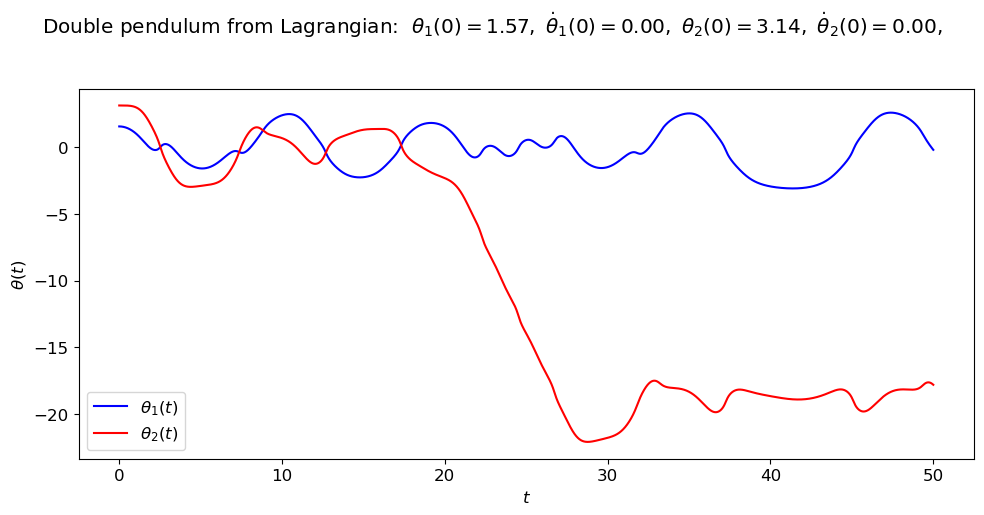

In [10]:
theta1_0 = np.pi/2
theta1_dot_0 = 0
theta2_0 = np.pi
theta2_dot_0 = 0

theta1, theta1_dot, theta2, theta2_dot = dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian: ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f},$'

fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
plot_y_vs_x(t_pts[start:stop], theta1[start:stop], axis_labels=theta_vs_time_labels,
            color='blue', label=r'$\theta_1(t)$', ax=ax_a)
plot_y_vs_x(t_pts[start:stop], theta2[start:stop], axis_labels=theta_vs_time_labels,
            color='red', label=r'$\theta_2(t)$', ax=ax_a)

fig.tight_layout()

## Show that system is chaotic for initial conditions beyond small angle approximation

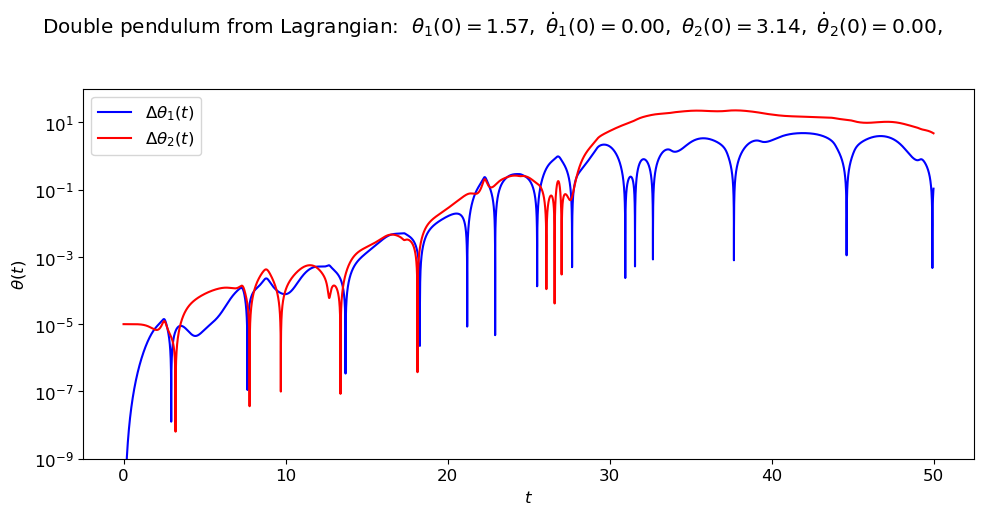

In [11]:
theta1_0 = np.pi/2
theta1_dot_0 = 0
theta2_0 = np.pi
theta2_dot_0 = 0

theta1, theta1_dot, theta2, theta2_dot = dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)
theta1b, theta1b_dot, theta2b, theta2b_dot = dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0-.00001, theta2_dot_0)

fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian: ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f},$'

fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
plot_y_vs_x(t_pts[start:stop], np.abs(theta1[start:stop]-theta1b[start:stop]), axis_labels=theta_vs_time_labels,
            color='blue', semilogy='true', label=r'$\Delta\theta_1(t)$', ax=ax_a)
plot_y_vs_x(t_pts[start:stop], np.abs(theta2[start:stop]-theta2b[start:stop]), axis_labels=theta_vs_time_labels,
            color='red', semilogy='true', label=r'$\Delta\theta_2(t)$', ax=ax_a)

ax_a.set_ylim(1.e-9, 100.)

fig.tight_layout()

#### Both systems are chaotic, as the difference is increasing, but they aren't increasing identically. The small difference of 0.00001 in initial conditions causes an extremely noticeable change in behavior, which is chaotic.